# Nonlinear optimization - 2022.2

## Optimum power for a set of $m$ lamps illuminating a set of $n$ flat patches to best approach a target illumination

Consider $m$ lamps illuminating $n$ (small flat) patches. The illumination intensity $I_k$ at the $k$-th patch depends linearly on the lamp powers $p_j$ as:
$$
I_k = \sum\limits_{j=1}^m a_{k,j}p_j, \quad \text{with} \quad a_{k,j} = \dfrac{\max\{\cos(\theta_{k,j}), 0\}}{r^{2}_{k,j}},
$$
where $r_{k,j}$ is the length of the vector $\mathbf{r}_{k,j}$ connecting the center of the $k$-th patch to the position of the $j$-th lamp and $\theta_{k,j}$ is the angle between the patch normal vector $\mathbf{n}_{k}$ and $\mathbf{r}_{k,j}$. See the Convex Optimization book slides for more details.

The proposed problem is to achieve a desired illumination $I_{des}$ with bounded lamp powers ($p_{max}$), i.e.,
$$
\begin{align*}
    & \min{\underset{k=1, 2, \ldots, n}{\max}\vert \log(I_k) - \log(I_{des})\vert} \\
    \text{s. t.}\quad & 0 \leq p_j \leq p_{max}, j = 1, 2, \ldots, m.
\end{align*}
$$

### Suboptimally solve the problem using, e.g., Matlab, according to the following approaches:

1. Using uniform power, i.e., $p_j = p, 0 \leq p \leq p_{max}$.
2. Using least-squares, i.e., $ \min. \sum\limits_{k=1}^n (I_k - I_{des})^2$, and rounding $p_j$ as $p_j = \max\{0, \min\{p_j, p_{max}\}\}$.
3. Using weighted least-squares, i.e., $ \min. \sum\limits_{k=1}^n (I_k - I_{des})^2 + \sum\limits_{k=1}^n w_j (p_j - p_{max})^2$ and iteratively adjusting the weights $w_j$ until $0 \leq p \leq p_{max}, \forall j$.
4. Using linear programming, i.e., 
$$
\begin{align*}
    & \min{\underset{k=1, 2, \ldots, n}{\max}\vert I_k - I_{des}\vert} \\
    \text{s. t.}\quad & 0 \leq p_j \leq p_{max}, j = 1, 2, \ldots, m.
\end{align*}
$$

    null at line 67 column 14

    null at line 67 column 14

    null at line 67 column 14

    null at line 67 column 14

    null at line 67 column 14



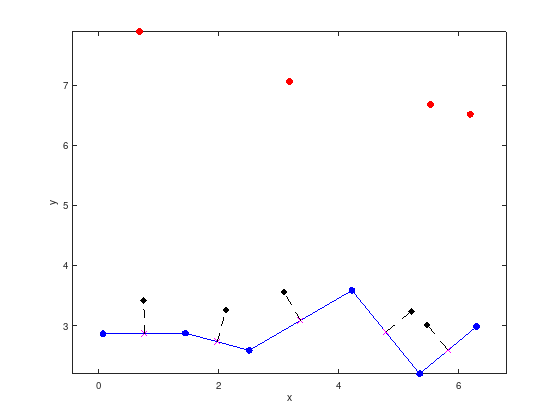

In [1]:
clc;
close all;

showFig = true;
numLamps = 4;
numPatches = 5;
maxPwr = 1;
desiredillum = 0.01;

% Code for random generation
% rng(20222);
% lampPos = repmat([0.5 6], numLamps, 1) + 3*rand(numLamps, 2);
% lampPos(1:end, 1) = cumsum(lampPos(:, 1));
% patchPos = repmat([0 2], numPatches+1, 1) + 2*rand(numPatches+1, 2);
% patchPos(1:end, 1) = cumsum(patchPos(:, 1));
% lampPos(:, 1) = lampPos(:, 1) + patchPos(1, 1);

lampPos = [0.6838 7.8976; 3.1835 7.0690; 5.5327 6.6806; 6.1963 6.5203];
patchPos = [0.0762 2.8621; 1.4506 2.8733; 2.5122 2.5864; 4.2246 3.5846; 5.3512 2.1960; 6.3013 2.9838];

lampPos = complex(lampPos(:,1), lampPos(:,2));
patchPos = complex(patchPos(:,1), patchPos(:,2));
patchCenter = (patchPos(1:end-1) + patchPos(2:end))/2;
patchNorm = patchPos(2:end) - patchPos(1:end-1);
minPatchLength = min(abs(patchNorm))/2;
for p = 1:length(patchNorm)
    n = null([real(patchNorm(p)) imag(patchNorm(p))]);
    patchNorm(p) = minPatchLength*complex(n(1), n(2));
end

if showFig == true
    plot(lampPos, 'ro', 'MarkerFaceColor', 'auto');
    hold on;
    plot(patchPos, 'bo-', 'MarkerFaceColor', 'auto');
    plot(patchCenter, 'mx', 'MarkerFaceColor', 'auto');
    plot(patchNorm + patchCenter, 'kd', 'MarkerFaceColor', 'auto');
    for i=1:length(patchCenter),
        plot([patchCenter(i) patchNorm(i) + patchCenter(i)], 'k--', 'MarkerFaceColor', 'auto');
    end
    axis equal;
end
ylabel('y');
xlabel('x');

radDist = zeros(length(patchCenter), length(lampPos));
angShift = zeros(length(patchCenter), length(lampPos));
for i = 1:length(patchCenter)
    for j = 1:length(lampPos)
        radDist(i, j) = abs(patchCenter(i) - lampPos(j));
        angShift(i, j) = angle(lampPos(j)-patchCenter(i))-angle(patchNorm(i));
    end
end

illumCoeff = radDist.^(-2).*max(cos(angShift), 0);
save -mat7-binary 'lamp.mat' illumCoeff desiredillum;

### Suboptimally solve the problem using, e.g., Matlab, according to the following approaches:

1. Using uniform power, i.e., $p_j = p, 0 \leq p \leq p_{max}$.
2. Using least-squares, i.e., $ \min. \sum\limits_{k=1}^n (I_k - I_{des})^2$, and rounding $p_j$ as $p_j = \max\{0, \min\{p_j, p_{max}\}\}$.
3. Using weighted least-squares, i.e., $ \min. \sum\limits_{k=1}^n (I_k - I_{des})^2 + \sum\limits_{k=1}^n w_j (p_j - p_{max})^2$ and iteratively adjusting the weights $w_j$ until $0 \leq p \leq p_{max}, \forall j$.
4. Using linear programming, i.e., 
$$
\begin{align*}
    & \min. \underset{k=1, 2, \ldots, n}{\max}\vert I_k - I_{des}\vert \\
    \text{s. t.}\quad & 0 \leq p_j \leq p_{max}, j = 1, 2, \ldots, m.
\end{align*}
$$

### 1. Using uniform power

For the first method, we have that $p_j = p$ for $j \in \{1, 2, \cdots, m\}$. Therefore, the optimization problem becomes

$$
\begin{align*}
        & \min{\underset{k=1, 2, \ldots, n}{\max}\left| \log\left(p\sum\limits_{j=1}^m a_{k,j}\right) - \log(I_{des})\right|} \\
        & \min{\underset{k=1, 2, \ldots, n}{\max}\left| \log\left(p\frac{a_{k}}{I_{des}}\right)\right|}.
\end{align*}
$$
where $a_{k} = \sum\limits_{j=1}^m a_{k,j}$.

In [13]:
using MAT, Convex, SCS

file = matopen("lamp.mat") # open .mat file on Julia

𝐀, I_des = read(file, "illumCoeff", "desiredillum") # matrix of the coefficients aⱼₖ
p = Variable() # uniform lamp power
# I_des = Constant(I_des) # desired power

𝐚 = vec(sum(𝐀, dims=1))
f = maximum(abs(log((p/I_des)*𝐚))) # objective function
problem = minimize(f, [p >= 0])

solve!(problem, SCS.Optimizer)

┌ Warning: Expression not DCP compliant. Trying to solve non-DCP compliant problems can lead to unexpected behavior.
└ @ Convex /home/tapyu/.julia/packages/Convex/ukggP/src/dcp.jl:25
┌ Warning: Problem not DCP compliant: objective is not DCP
└ @ Convex /home/tapyu/.julia/packages/Convex/ukggP/src/problems.jl:54


------------------------------------------------------------------
	       SCS v3.2.0 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 11, constraints m: 26
cones: 	  z: primal zero / dual free vars: 1
	  l: linear vars: 13
	  e: exp vars: 12, dual exp vars: 0
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct
	  nnz(A): 35, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 7.07e+00  1.00e+00  1.07e+01 -5.29e+00  1.00e-01  5.49e-04 
    25| 7.46e-06  5.18e-08  6.86e-06  3.43e-06  1.00e-01  6.34e-04 
-----------